In [1]:
import csv
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from io import StringIO
cwd = os.getcwd()
import json
import requests
import urllib.request


## AgCensus (txt long format files)

In [2]:
listA= ['FARM OPERATIONS - ACRES OPERATED',
        'FARM OPERATIONS - AREA OPERATED, MEASURED IN ACRES / OPERATION, MEDIAN',
        'FARM OPERATIONS - NUMBER OF OPERATIONS',
        'PRACTICES, LAND USE, CROPLAND, COVER CROP PLANTED, (EXCL CRP) - ACRES',
        'PRACTICES, LAND USE, CROPLAND, COVER CROP PLANTED, (EXCL CRP) - NUMBER OF OPERATIONS',
       'AG LAND, INCL BUILDINGS - ASSET VALUE, MEASURED IN $ / ACRE',
       'COMMODITY TOTALS - SALES, MEASURED IN $',
       'COMMODITY TOTALS, LANDLORD SHARE - SALES, MEASURED IN $',
       'RENT, CASH, LAND & BUILDINGS - EXPENSE, MEASURED IN $',
        'AG LAND, CROPLAND - ACRES',
        'AG LAND, CROPLAND - NUMBER OF OPERATIONS',
       'AG LAND, CROPLAND, HARVESTED, IRRIGATED - NUMBER OF OPERATIONS',
       'AG LAND, PASTURELAND, (EXCL CROPLAND & WOODLAND) - ACRES',
        'AG LAND, CROPLAND, PASTURED ONLY - ACRES',
       'AG LAND, WOODLAND, PASTURED - ACRES',
       'AG LAND, CROPLAND, HARVESTED - ACRES',
       'AG LAND, CROPLAND, HARVESTED - NUMBER OF OPERATIONS',
        'AG LAND, CROPLAND, HARVESTED, IRRIGATED - ACRES',
        'AG LAND, CROPLAND, (EXCL HARVESTED & PASTURED), CULTIVATED SUMMER FALLOW - ACRES',
        'AG LAND, CROPLAND, (EXCL HARVESTED & PASTURED), ALL CROPS FAILED - ACRES',
        'AG LAND, CROP INSURANCE - ACRES',
        'AG LAND, CROPLAND, (EXCL HARVESTED & PASTURED), IDLE - ACRES',
        'AG LAND, CROPLAND, (EXCL HARVESTED & PASTURED), IDLE - NUMBER OF OPERATIONS',
        'AG LAND, (EXCL CROPLAND & PASTURELAND & WOODLAND) - ACRES',
       'LABOR, HIRED - NUMBER OF WORKERS',
        'GOVT PROGRAMS, FEDERAL, CONSERVATION & WETLANDS - OPERATIONS WITH RECEIPTS',
        'GOVT PROGRAMS, FEDERAL, CONSERVATION & WETLANDS - RECEIPTS, MEASURED IN $',
       'GOVT PROGRAMS, FEDERAL, (EXCL CONSERVATION & WETLANDS) - RECEIPTS, MEASURED IN $',
        'GOVT PROGRAMS, FEDERAL, (EXCL CONSERVATION & WETLANDS) - OPERATIONS WITH RECEIPTS',
       'GOVT PROGRAMS, FEDERAL, CONSERVATION & WETLANDS - ACRES',
       'INCOME, FARM-RELATED - RECEIPTS, MEASURED IN $',
       'INCOME, FARM-RELATED - OPERATIONS WITH RECEIPTS',
       'EXPENSE TOTALS, OPERATING - EXPENSE, MEASURED IN $ / OPERATION',
        'EXPENSE TOTALS, OPERATING - OPERATIONS WITH EXPENSE',
       'LABOR, HIRED - EXPENSE, MEASURED IN $',
       'LABOR, CONTRACT - EXPENSE, MEASURED IN $']

listB= [
       'PRODUCERS, FEMALE - NUMBER OF PRODUCERS',
       'PRODUCERS, FEMALE - ACRES OPERATED',
        'PRODUCERS, AGE GE 75 - NUMBER OF PRODUCERS',
        'PRODUCERS, AGE 55 TO 64 - NUMBER OF PRODUCERS',
        'PRODUCERS, AGE 65 TO 74 - NUMBER OF PRODUCERS',
       'PRODUCERS, AGE 45 TO 54 - NUMBER OF PRODUCERS',
       'PRODUCERS, AGE LT 25 - NUMBER OF PRODUCERS',
       'PRODUCERS, AGE 35 TO 44 - NUMBER OF PRODUCERS',
       'PRODUCERS, HISPANIC - NUMBER OF PRODUCERS',
        'PRODUCERS, HISPANIC - ACRES OPERATED',
       'PRODUCERS, WHITE - ACRES OPERATED',
        'PRODUCERS, WHITE - ACRES OPERATED',
        'PRODUCERS, BLACK OR AFRICAN AMERICAN - NUMBER OF PRODUCERS',
        'PRODUCERS, BLACK OR AFRICAN AMERICAN - ACRES OPERATED',
       ]

In [11]:
x=2022
file= '/Data/qs.census'+str(x)+'.txt'
df= pd.read_csv(cwd[:-4]+file, sep='\t', low_memory=False)
df= df[df.SECTOR_DESC!= 'ANIMALS & PRODUCTS']
df= df[df.SECTOR_DESC!= 'CROPS']
df= df[df['DOMAINCAT_DESC']== 'NOT SPECIFIED']

In [12]:
df['SHORT_DESC'].isin(['AG LAND, CROPLAND, HARVESTED, IRRIGATED - ACRES']).sum()

3093

In [4]:
df[df['SECTOR_DESC']== 'ECONOMICS']['SHORT_DESC'].unique()

array(['LABOR, HIRED, GE 150 DAYS - NUMBER OF WORKERS',
       'LABOR, HIRED, LT 150 DAYS - NUMBER OF WORKERS',
       'LABOR, UNPAID - NUMBER OF WORKERS',
       'LABOR, HIRED - NUMBER OF WORKERS',
       'ANIMAL TOTALS - EXPENSE, MEASURED IN $',
       'FEED - EXPENSE, MEASURED IN $',
       'CHEMICAL TOTALS - EXPENSE, MEASURED IN $',
       'INTEREST - EXPENSE, MEASURED IN $',
       'SEEDS & PLANTS TOTALS - EXPENSE, MEASURED IN $',
       'DEPRECIATION - EXPENSE, MEASURED IN $',
       'DEPRECIATION - OPERATIONS WITH EXPENSE',
       'AG SERVICES, MACHINERY RENTAL - EXPENSE, MEASURED IN $',
       'AG SERVICES, MACHINERY RENTAL - OPERATIONS WITH EXPENSE',
       'AG SERVICES, UTILITIES - EXPENSE, MEASURED IN $',
       'AG SERVICES, UTILITIES - OPERATIONS WITH EXPENSE',
       'AG SERVICES, CUSTOMWORK - EXPENSE, MEASURED IN $',
       'AG SERVICES, CUSTOMWORK - OPERATIONS WITH EXPENSE',
       'ANIMAL TOTALS - OPERATIONS WITH EXPENSE',
       'ANIMAL TOTALS, BREEDING - EXPENSE, MEA

In [106]:
#df['SHORT_DESC'][df['SECTOR_DESC']== 'ECONOMICS'].unique()
for x in listA+listB:
    if df['SHORT_DESC'].isin([x]).sum() <2500:
        print(x)

In [508]:
d[d.SECTOR_DESC== 'DEMOGRAPHICS']['SHORT_DESC'].unique()[119:180]

array(['PRODUCERS, PRINCIPAL, YEARS ON ANY OPERATION, LT 11 YEARS - NUMBER OF OPERATIONS',
       'PRODUCERS, YEARS ON ANY OPERATION, LT 11 YEARS - ACRES OPERATED',
       'PRODUCERS, PRINCIPAL, YEARS ON ANY OPERATION, LT 11 YEARS - ACRES OPERATED',
       'PRODUCERS, FEMALE, PRIMARY OCCUPATION, FARMING - NUMBER OF PRODUCERS',
       'PRODUCERS, FEMALE, PRIMARY OCCUPATION, (EXCL FARMING) - NUMBER OF PRODUCERS',
       'PRODUCERS, FEMALE, DAYS WORKED OFF OPERATION, 0 DAYS - NUMBER OF PRODUCERS',
       'PRODUCERS, FEMALE, DAYS WORKED OFF OPERATION, GE 200 DAYS - NUMBER OF PRODUCERS',
       'PRODUCERS, HISPANIC, FEMALE - NUMBER OF PRODUCERS',
       'PRODUCERS, BLACK OR AFRICAN AMERICAN, FEMALE - NUMBER OF PRODUCERS',
       'PRODUCERS, NATIVE HAWAIIAN OR OTHER PACIFIC ISLANDER, FEMALE - NUMBER OF PRODUCERS',
       'PRODUCERS, WHITE, FEMALE - NUMBER OF PRODUCERS',
       'PRODUCERS, AMERICAN INDIAN OR ALASKA NATIVE - NUMBER OF OPERATIONS',
       'PRODUCERS, BLACK OR AFRICAN AMERICAN -

In [3]:
#Get AgCensus data from txt long format files
def get_census(file):
    df= pd.read_csv(cwd[:-4]+file, sep='\t', low_memory=False)
    df= df[df.SECTOR_DESC!= 'ANIMALS & PRODUCTS']
    df= df[df.SECTOR_DESC!= 'CROPS']
    df= df[df['DOMAINCAT_DESC']== 'NOT SPECIFIED']
    df['SHORT_DESC']= df['SHORT_DESC'].str.replace('OPERATORS','PRODUCERS')
    df= df[df['SHORT_DESC'].isin(listA+listB)]
    df.dropna(axis=0, subset=['STATE_FIPS_CODE'], inplace=True)
    df.dropna(axis=0, subset=['COUNTY_ANSI'], inplace=True)
    df['STATE_FIPS_CODE']= df['STATE_FIPS_CODE'].astype(int).astype(str).str.zfill(2)
    df['COUNTY_ANSI']= df['COUNTY_ANSI'].astype(int).astype(str).str.zfill(3)
    df['county_fips']= df['STATE_FIPS_CODE']+df['COUNTY_ANSI']
    df1= pd.pivot(df, index='county_fips', columns='SHORT_DESC', values='VALUE').fillna(0).reset_index()
    return df1

In [4]:
# Merge 3 Census
dfce= pd.DataFrame()
for x in [2012, 2017, 2022]:
    df= get_census('/Data/qs.census'+str(x)+'.txt')
    df['year']= x
    dfce= pd.concat([dfce, df], sort=False)


In [5]:
dfce#==0).sum()#[dfce['year']==2017]

,county_fips,"AG LAND, (EXCL CROPLAND & PASTURELAND & WOODLAND) - ACRES","AG LAND, CROP INSURANCE - ACRES","AG LAND, CROPLAND - ACRES","AG LAND, CROPLAND - NUMBER OF OPERATIONS","AG LAND, CROPLAND, (EXCL HARVESTED & PASTURED), ALL CROPS FAILED - ACRES","AG LAND, CROPLAND, (EXCL HARVESTED & PASTURED), CULTIVATED SUMMER FALLOW - ACRES","AG LAND, CROPLAND, (EXCL HARVESTED & PASTURED), IDLE - ACRES","AG LAND, CROPLAND, (EXCL HARVESTED & PASTURED), IDLE - NUMBER OF OPERATIONS","AG LAND, CROPLAND, HARVESTED - ACRES",...,"RENT, CASH, LAND & BUILDINGS - EXPENSE, MEASURED IN $",year,"PRACTICES, LAND USE, CROPLAND, COVER CROP PLANTED, (EXCL CRP) - ACRES","PRACTICES, LAND USE, CROPLAND, COVER CROP PLANTED, (EXCL CRP) - NUMBER OF OPERATIONS","PRODUCERS, AGE 35 TO 44 - NUMBER OF PRODUCERS","PRODUCERS, AGE 45 TO 54 - NUMBER OF PRODUCERS","PRODUCERS, AGE 55 TO 64 - NUMBER OF PRODUCERS","PRODUCERS, AGE 65 TO 74 - NUMBER OF PRODUCERS","PRODUCERS, AGE GE 75 - NUMBER OF PRODUCERS","PRODUCERS, AGE LT 25 - NUMBER OF PRODUCERS"
0,01001,"5,074","18,797","41,293",258,508,116,"6,995",70,"29,676",...,"1,121,000",2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01003,"9,456","66,221","100,901",664,"2,028",601,"5,039",128,"91,571",...,"5,204,000",2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,01005,"17,330","16,019","41,301",355,597,"1,245","11,557",147,"22,915",...,"1,130,000",2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,01007,"3,544",(D),"12,608",111,231,0,"3,833",24,"7,872",...,"70,000",2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,01009,"10,411","5,591","37,147",751,463,564,"6,069",130,"27,598",...,"1,223,000",2012,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3068,56037,(D),"28,941","36,859",124,"3,174",(D),504,10,"28,852",...,"1,704,000",2022,838,10,47,53,72,72,38,0
3069,56039,(D),"4,450","13,888",80,(D),(D),665,12,"12,421",...,"588,000",2022,(D),9,28,27,46,62,45,0
3070,56041,"5,086","27,469","60,227",250,"11,274",959,"1,148",15,"42,304",...,"3,587,000",2022,807,6,138,121,174,227,93,20
3071,56043,"4,067","28,017","49,270",163,327,912,"6,733",19,"37,240",...,"3,217,000",2022,"3,679",17,38,70,101,80,60,2


## AgCensus from api

In [6]:
# http direction 
nass_base = 'http://quickstats.nass.usda.gov/api/api_GET?'
# My personal key
key= '1897574B-86B2-3182-B9C3-3BFF302E3042'
# Function
def api_nass(api_params, key):
    apidata = requests.get(nass_base, params=api_params)
    apidata = apidata.json()
    df = pd.DataFrame.from_dict(apidata['data'])
    return df

In [7]:
def dataframe_usda(varlist,key, years, sector ,commodity,domain,geolevel, separ, label_index):
    dfA = pd.DataFrame(columns=['year','state_fips_code','state_name','county_ansi','county_name'])

    for z in varlist:
        label= z.split(separ)[label_index]
        dfB = pd.DataFrame()
        for y in years:

            # Parameters for land tenure data
            area_params = {'key': key,
                       'sector_desc': sector,
                       'commodity_desc': commodity,
                       'domain_desc': domain,
                       'short_desc': z,
                       'agg_level_desc': geolevel.upper(),
                       'year': y}
            df= api_nass(area_params, key)
            df[label]= df['Value'].str.replace(',', '')
            df[label]= pd.to_numeric(df[label], errors='ignore')

            # merge number of operations (farms) with area

            filt=['year','state_fips_code','state_name','county_ansi','county_name',label]

            dfB=dfB.append(df[filt], 'sort=False') #append years

        dfA=dfA.merge(dfB, how='outer', on=['year','state_fips_code','state_name','county_ansi','county_name']) #merge vars          

    return dfA

### State/local government programs

In [9]:
varlist=['INCOME, FARM-RELATED, GOVT PROGRAMS, STATE & LOCAL - RECEIPTS, MEASURED IN $',
         'INCOME, FARM-RELATED, GOVT PROGRAMS, STATE & LOCAL - OPERATIONS WITH RECEIPTS']
filterlist= ['year','state_fips_code','state_name','county_ansi','county_name']
dfst= dataframe_usda(varlist, key, [2012, 2017, 2022], 'ECONOMICS','INCOME, FARM-RELATED','TOTAL','county',' - ',-1)
dfst.rename(columns={'RECEIPTS, MEASURED IN $': 'state_prog_receipts','OPERATIONS WITH RECEIPTS': 'state_prog_ope',
                      'state_fips_code':'state_fips'}, inplace= True)
dfst['county_fips']= dfst['state_fips']+dfst['county_ansi']

### Organic Operations (by status: NOP certified + Exempt)

In [11]:
def dataframe_usda(varlist,filterlist, key, years, sector ,commodity,domain,geolevel, separ, label_index):
    dfA = pd.DataFrame(columns=filterlist)

    for z in varlist:

        label= z.split(separ)[label_index]
        dfB = pd.DataFrame()
        for y in years:

                # Parameters for land tenure data
            area_params = {'key':  key,
                           'sector_desc': sector,
                           'commodity_desc': commodity,
                           'domain_desc': domain,
                           'short_desc': z,
                           'agg_level_desc': geolevel.upper(),
                           'year': y}
            df= api_nass(area_params, key)
            df[label]= df['Value'].str.replace(',', '')
            df[label]= pd.to_numeric(df[label], errors='ignore')

                # merge number of operations (farms) with area

            filterlist2= filterlist+ [label]
            dfB=dfB.append(df[filterlist2], ignore_index=True) #append years

        dfA=dfA.merge(dfB, how='outer', on=filterlist) #merge different vars          

    return dfA



In [12]:
varlist=['FARM OPERATIONS, ORGANIC - NUMBER OF OPERATIONS',
        ]
filterlist= ['year','state_fips_code','state_name','county_ansi','county_name']
dfor= dataframe_usda(varlist,filterlist, key, [2012, 2017, 2022],'ECONOMICS', 'FARM OPERATIONS','ORGANIC STATUS','county',' - ',0)

dfor['county_fips']= dfor['state_fips_code']+dfor['county_ansi']

In [13]:
dfor1= dfor.groupby(['county_fips','year'])['FARM OPERATIONS, ORGANIC'].sum().reset_index()
dfor1

,county_fips,year,"FARM OPERATIONS, ORGANIC"
0,01003,2012,5
1,01003,2022,2
2,01005,2012,1
3,01005,2017,2
4,01009,2012,3
...,...,...,...
5364,56033,2017,1
5365,56033,2022,4
5366,56035,2017,2
5367,56041,2017,1


### Farm organic operations (transitioning)

In [14]:
varlist=['AG LAND, ORGANIC, TRANSITIONING - NUMBER OF OPERATIONS',
        ]
filterlist= ['year','state_fips_code','state_name','county_ansi','county_name']
dftr= dataframe_usda(varlist,filterlist, key, [2012, 2017, 2022],'ECONOMICS', 'AG LAND','ORGANIC STATUS','county',', ',-1)

dftr['county_fips']= dftr['state_fips_code']+dftr['county_ansi']

In [15]:
dftr

,year,state_fips_code,state_name,county_ansi,county_name,TRANSITIONING - NUMBER OF OPERATIONS,county_fips
0,2012,01,ALABAMA,089,MADISON,1,01089
1,2012,01,ALABAMA,103,MORGAN,1,01103
2,2012,01,ALABAMA,049,DE KALB,1,01049
3,2012,01,ALABAMA,055,ETOWAH,1,01055
4,2012,01,ALABAMA,095,MARSHALL,2,01095
...,...,...,...,...,...,...,...
2624,2022,55,WISCONSIN,045,GREEN,4,55045
2625,2022,55,WISCONSIN,105,ROCK,1,55105
2626,2022,55,WISCONSIN,089,OZAUKEE,2,55089
2627,2022,55,WISCONSIN,131,WASHINGTON,6,55131


### Insurance (acres & operations)

In [10]:
varlist=['AG LAND, CROP INSURANCE - NUMBER OF OPERATIONS', 'AG LAND, CROP INSURANCE - ACRES']
filterlist= ['year','state_fips_code','state_name','county_ansi','county_name']
dfin= dataframe_usda(varlist,filterlist, key, [2012, 2017, 2022],'ECONOMICS', 'AG LAND','TOTAL','county',', ',-1)
dfin['county_fips']= dfin['state_fips_code']+dfin['county_ansi']

TypeError: dataframe_usda() takes 9 positional arguments but 10 were given

In [22]:
(dfin=='(D)').sum()

year                                     0
state_fips_code                          0
state_name                               0
county_ansi                              0
county_name                              0
CROP INSURANCE - NUMBER OF OPERATIONS    0
CROP INSURANCE - ACRES                   0
county_fips                              0
dtype: int64

In [ ]:
dfag= pd.merge(dfst, dfor1, how='outer')
dfag= pd.merge(dfag, dftr, how='outer')
dfag= pd.merge(dfag, dfin, how='outer')

In [84]:
# from csv data
dfag= pd.read_csv(cwd[:-4]+'Data/agcensus2012_2022.csv')

In [85]:
dfag['county_fips']= dfag['county_fips'].astype(str)
dfag['county_fips']= dfag['county_fips'].str.zfill(5)
dfag= dfag[['year','county_fips','state_prog_receipts','state_prog_ope','FARM OPERATIONS, ORGANIC',
       'TRANSITIONING - NUMBER OF OPERATIONS','CROP INSURANCE - NUMBER OF OPERATIONS', 'CROP INSURANCE - ACRES']]
dfag['state_fips']= dfag['county_fips'].str[:2]
dfag= dfag[dfag['state_fips'].isin(['00','15'])==False]
dfag['cnt']= dfag['county_fips'].str[2:]

In [93]:
dfag.dtypes#.isna().sum()

year                                       int64
county_fips                               object
state_prog_receipts                      float64
state_prog_ope                           float64
FARM OPERATIONS, ORGANIC                 float64
TRANSITIONING - NUMBER OF OPERATIONS     float64
CROP INSURANCE - NUMBER OF OPERATIONS    float64
CROP INSURANCE - ACRES                   float64
state_fips                                object
cnt                                       object
dtype: object

In [98]:
dfag

,county_fips,year,state_prog_receipts,state_prog_ope,organic_ope,org_trans_ope,crop_insurance_ope,crop_insurance_acres
0,01059,2012,0.0,6.0,0.0,0.0,22.0,7591.0
1,01077,2012,0.0,3.0,0.0,0.0,88.0,55813.0
2,01079,2012,41000.0,10.0,0.0,0.0,76.0,70903.0
3,01083,2012,0.0,7.0,1.0,0.0,143.0,99878.0
4,01089,2012,NaN,2.0,0.0,1.0,120.0,83258.0
...,...,...,...,...,...,...,...,...
14731,55037,2022,0.0,0.0,0.0,0.0,1.0,NaN
14763,56019,2022,0.0,0.0,0.0,0.0,46.0,469281.0
14773,56037,2022,0.0,0.0,0.0,0.0,18.0,28941.0
14774,56009,2022,0.0,0.0,0.0,0.0,22.0,234765.0


In [89]:
dfag['CROP INSURANCE - ACRES']= dfag['CROP INSURANCE - ACRES'].replace('(D)', 999.99, regex=True)
dfag['state_prog_receipts']= dfag['state_prog_receipts'].replace('(D)', 999.99, regex=True)
dfag['state_prog_receipts']= dfag['state_prog_receipts'].replace('(Z)', 999.99, regex=True)
dfag['CROP INSURANCE - ACRES']= dfag['CROP INSURANCE - ACRES'].astype(float)
dfag['state_prog_receipts']= dfag['state_prog_receipts'].astype(float)

In [95]:
# to remove duplicates nan values
for x in ['state_prog_receipts','state_prog_ope','FARM OPERATIONS, ORGANIC',
       'TRANSITIONING - NUMBER OF OPERATIONS','CROP INSURANCE - NUMBER OF OPERATIONS', 'CROP INSURANCE - ACRES']:
    dfag[x].replace(np.nan, 0, inplace=True) # missing values are zero (values not reported in Agcensus)
    dfag[x].replace(999.99, np.nan, inplace=True) # '(D)' are nan
    dfag[x+'_n']= dfag.groupby(['county_fips','year'])[x].transform('max')
    dfag[x+'_n'].replace(999.99, '(D)', inplace=True)

In [96]:
dfag.drop_duplicates(subset=['county_fips','year'], inplace=True)

In [97]:
dfag= dfag[['county_fips','year','state_prog_receipts_n','state_prog_ope_n','FARM OPERATIONS, ORGANIC_n',
       'TRANSITIONING - NUMBER OF OPERATIONS_n','CROP INSURANCE - NUMBER OF OPERATIONS_n', 'CROP INSURANCE - ACRES_n']]
dfag.rename(columns={'state_prog_receipts_n':'state_prog_receipts','state_prog_ope_n': 'state_prog_ope',
                     'FARM OPERATIONS, ORGANIC_n': 'organic_ope',
                     'TRANSITIONING - NUMBER OF OPERATIONS_n': 'org_trans_ope',
                     'CROP INSURANCE - NUMBER OF OPERATIONS_n': 'crop_insurance_ope', 
                     'CROP INSURANCE - ACRES_n': 'crop_insurance_acres'}, inplace=True)

/Users/elizabethespinosa/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4223: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(**kwargs)


## Cover crops
## Source: Kling's data repository

In [2]:
url= 'https://raw.githubusercontent.com/matthewkling/ca2cc-county/main/data/output/time_series_data.csv'
df= pd.read_csv(url)

In [3]:
### Condensate values in the 'raw' column
df['raw']= df['raw'].fillna(df['value'])
## Keep relevant columns 
df= df[['variable', 'fips','year','raw']]
## Keep only selected variables
listC= ['cover_crop_ops',
       'cover_crop_acres']
df= df[df['variable'].isin(listC)]
df.drop_duplicates(subset=['variable', 'fips', 'year'], inplace=True)
# Change to wide format
df1= df.pivot_table(index=['fips','year'], columns='variable', values='raw').reset_index()


In [4]:
df1['county_fips']=df1['fips'].astype(str).str.zfill(5)
# replace np.nan values for (D)
df1['cover_crop_acres'].replace(np.nan, '(D)', inplace=True)
df1['cover_crop_ops'].replace(np.nan, '(D)', inplace=True)
dfcc= df1[['county_fips','year','cover_crop_acres','cover_crop_ops']]

In [12]:
df1.dtypes()

TypeError: 'Series' object is not callable

In [13]:
df1.groupby(['year'])['cover_crop_acres'].sum()

TypeError: unsupported operand type(s) for +: 'float' and 'str'

## Yale's Climate Opinion 2022

In [3]:
dfy= pd.read_csv(cwd[:-4]+'Data/yale_climate_2010_2023.csv')

In [4]:
# Select variables
listbe= ['human'] #Beliefs of Anthropogenic origin and negative effects of climate change ,'affectweather'
listrisk= ['personal','timing'] # Risk perceptions of the future (only individual)
listpol= ['regulate']#Climate policy priorities with personal repercusions 'prioritycleanenergy',,'citizens'

dfy1= dfy[dfy['varname'].isin(listbe+listrisk+listpol)] #select variables
dfy1= dfy1[dfy1['geotype']=='county'] #select counties
dfy1['county_fips']= dfy1['fips_code'].astype(str)
dfy1['county_fips']= dfy1['county_fips'].str.zfill(5)

In [5]:
# Rearrange data
dfyale= pd.DataFrame()
for y in ['2014','2018','2022']:
    df= dfy1[['county_fips','varname',y]].pivot_table(index=['county_fips'], columns='varname', values=y).reset_index()
    df['year']= int(y)
    dfyale= pd.concat([dfyale, df], sort=False)

In [6]:
dfyale['year'].replace(2014, 2012, inplace=True) #Use 2014 data as 2012
dfyale['year'].replace(2018, 2017, inplace=True) #Use 2018 data as 2017

(array([  4.,   2.,   5.,  21.,  33.,  74., 105., 139., 159., 146., 194.,
        149., 221., 215., 173., 344., 183., 435., 476., 228., 566., 311.,
        561., 605., 318., 593., 275., 560., 465., 208., 347., 308., 152.,
        239., 118., 154., 111.,  51.,  75.,  32.,  39.,  17.,   7.,   5.,
          2.,   2.,   0.,   0.,   0.,   1.]),
 array([57.55 , 58.159, 58.768, 59.377, 59.986, 60.595, 61.204, 61.813,
        62.422, 63.031, 63.64 , 64.249, 64.858, 65.467, 66.076, 66.685,
        67.294, 67.903, 68.512, 69.121, 69.73 , 70.339, 70.948, 71.557,
        72.166, 72.775, 73.384, 73.993, 74.602, 75.211, 75.82 , 76.429,
        77.038, 77.647, 78.256, 78.865, 79.474, 80.083, 80.692, 81.301,
        81.91 , 82.519, 83.128, 83.737, 84.346, 84.955, 85.564, 86.173,
        86.782, 87.391, 88.   ]),
 <a list of 50 Patch objects>)

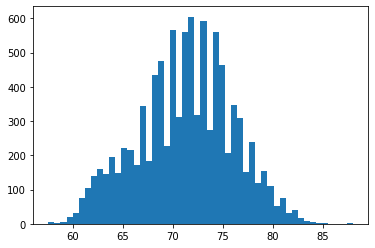

In [8]:
plt.hist(dfyale['regulate'], bins=50)

## Agricultural sector Employment (Bureau of Economic Activities)

In [21]:
## To obtain keys from Employment Table CAEMP25N, from Regional Dataset 
key= '1E9C7AEA-0BFA-4AD0-B97A-4BCEB25CF221'
bea_base= 'http://apps.bea.gov/api/data?&UserID='+key+'&method=GetParameterValuesFiltered&datasetname=Regional&TargetParameter=LineCode&TableName=CAEMP25N&ResultFormat=json'
apidata = requests.get(bea_base)
apidata = apidata.json()

In [22]:
# datasetnam= Regional
# TableName=CAEMP25N  Full time and part time employment by NAIICS industry
# LineCode=10 Total employment
# {'Key': '50', 'Desc': '[CAEMP25N] Farm proprietors employment'}
# {'Key': '70', 'Desc': '[CAEMP25N] Farm employment (NAICS:111-112)'

# Data retrieving
def data_bea(key, line, year):
    bea_base='http://apps.bea.gov/api/data?&UserID='+key+'&method=GetData&datasetname=Regional&TableName=CAEMP25N&LineCode='+line+'&GeoFips=COUNTY&Year='+year+'&ResultFormat=JSON'
    apidata = requests.get(bea_base)
    apidata = apidata.json()
    df = pd.DataFrame.from_dict(apidata['BEAAPI']['Results']['Data'])
    return df

In [23]:
dfemp= pd.DataFrame(columns=['county_fips','year'])

for line, var in zip(['10','50','70'], ['tot_employ','farmers_employm','infarms_employ']): # 3 employment variables
    dfT= pd.DataFrame(columns=['county_fips','year',var]) 
    for year in ['2012','2017', '2022']: #3 years
        df= data_bea(key, line, year)
        df.rename(columns= {'GeoFips':'county_fips', 'TimePeriod':'year',
                            'DataValue': var}, inplace=True)
        df[var]= df[var].str.replace(',', '')
        df[var]= pd.to_numeric(df[var], errors='ignore')
        dfT=dfT.append(df[['county_fips','year', var]], 'sort=False') #append years

    dfemp=dfemp.merge(dfT, how='outer', on=['county_fips','year']) #merge vars   
    
dfemp['year']= dfemp['year'].astype(int)

In [29]:
dfemp

,county_fips,year,tot_employ,farmers_employm,infarms_employ
0,01001,2012,16421,345,429
1,01003,2012,93218,833,1182
2,01005,2012,12251,500,593
3,01007,2012,6293,165,169
4,01009,2012,14473,1108,1275
...,...,...,...,...,...
9349,56037,2022,26840,228,280
9350,56039,2022,39800,140,211
9351,56041,2022,12175,289,387
9352,56043,2022,5235,184,317


## Cropland Diversity
## Source: Cropland DataLayer

In [27]:
def getstat_cdl(year1,fipscode):
    url='https://nassgeodata.gmu.edu/axis2/services/CDLService/GetCDLStat?year='+year1+'&fips='+fipscode+'&format=csv'
    response = requests.get(url).text
    d= response.find('https://nassgeodata.gmu.edu/webservice/nass_data_cache/')
    e= response.find('.csv')
    g= response[d:e+4]
    df=pd.read_csv(g)
    return df

In [28]:
def clean_cropsdata(df):
    df=df.rename(columns={'Value':'cropcode',' Category':'cropname' , '  Acreage':'Acreage'}) 
    df['cropname']=df['cropname'].str[1:]
    return df

In [29]:
def cropland_entropy(df):
    
    df['p'] = df['Acreage']/(df['Acreage'].sum())
    df['plnp']= np.log(df['p'])*df['p']
    
    return -(df['plnp'].sum()) #Shannon entropy

In [30]:
## Open crop categories
dfcdl= pd.read_csv(cwd[:-4]+'/Data/CDL_crops_categ.csv')
### Remove land uses not related to crops
remove= ['wetland','woodland','grass','Na']


In [ ]:
## Iterate over three periods of time and every state
dfen= pd.DataFrame(columns= ('county_fips','year','cropland_entropy')) 

for county in list(dfce['county_fips'].unique()):
    for year in ['2012', '2017', '2022']:
        try:
            df= getstat_cdl(year,county)
            df= clean_cropsdata(df)
            dfc= pd.merge(df, dfcdl[['cropcode','Category','catname']], on=['cropcode'], how='outer')
            
            ## keep only crops, remove woodlands, grassland and wetland
            dfc1 = dfc[(dfc['catname'].isin(remove) == False)]
            dfc1.dropna(how= 'any', inplace=True)
            entropy= cropland_entropy(dfc1) #compute cropland entropy
            # append entropy measurements in dataframe
            dfen= dfen.append({'county_fips': county,'year': year,'cropland_entropy':entropy}, ignore_index=True)  
        except:
            pass

/Users/elizabethespinosa/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  del sys.path[0]
/Users/elizabethespinosa/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/elizabethespinosa/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc

In [26]:
# from csv
dfen= pd.DataFrame()
dfen1= pd.read_csv(cwd[:-4]+'Data/entropy2012.csv')
dfen1['year']= 2012
dfen2= pd.read_csv(cwd[:-4]+'Data/entropy2017.csv')
dfen2['year']= 2017
dfen3= pd.read_csv(cwd[:-4]+'Data/entropy2022.csv')
dfen3['year']= 2022
dfen= pd.merge(dfen1, dfen2, how='outer')
dfen= pd.merge(dfen, dfen3, how='outer')

In [27]:
dfen['county_fips']= dfen['county_fips'].astype(str)
dfen['county_fips']= dfen['county_fips'].str.zfill(5)
dfen= dfen[['county_fips','year','entropy']]

In [60]:
dfen

,county_fips,year,entropy
0,01001,2012,1.183553
1,01003,2012,1.807982
2,01005,2012,1.222181
3,01007,2012,0.801656
4,01009,2012,1.185202
...,...,...,...
9165,56037,2022,0.832385
9166,56039,2022,1.166961
9167,56041,2022,0.248131
9168,56043,2022,1.668656


## Climate data (NOAA)

In [27]:
## 'https://www.ncei.noaa.gov/data/nclimgrid-daily/access/averages/'
def annual_climate(var, year1, year2, month1, month2):
    dfy = pd.DataFrame(columns=['county_fips','year']) #year dataframe
    for ye in np.arange(year1, year2+1,1): #Year range
        dfm= pd.DataFrame() # montly dataframe
        for mo in np.arange(month1, month2+1,1): #Month range
            df= pd.read_csv('https://www.ncei.noaa.gov/data/nclimgrid-daily/access/averages/'+str(ye)+'/'+var+'-'+str(ye)+str(mo).zfill(2)+'-cty-scaled.csv',sep=',', header=None)
            df.rename(columns={1: 'county_fips',3:'year',5: 'var'}, inplace=True)
            df.drop(columns=[0,2], inplace=True)
            df.replace(-999.99, np.nan, inplace=True) #days of the month < 31 are filled with -999.99
            if var== 'prcp': 
                # Accumulated precipitation
                df['pcp_mm']= df.iloc[:, 4:].sum(axis=1)
                # 1-inch pcp days:
                for days in df.columns[4:-1]: #take days columns
                    df[str(days)] = np.where(df[days] >25.4, 1, 0) #select days with more than 1 inch or 25.4 mm pcp
                df['pcp_days'] = df.iloc[:, 36:].sum(axis=1) # accumulated sum 1-inch pcp days in given month
                df= df[['county_fips','pcp_mm','pcp_days']]
            elif var== 'tavg': # Average temperature
                df['tavg']= df.iloc[:, 4:].mean(axis=1)
                df= df[['county_fips','tavg']]
            elif var== 'tmax': #accumulated degree days
                for days in df.columns[4:]: #take each day-column
                    df[str(days)] = np.where(df[days] >29, 1, 0) #select days with more than 29C
                df['edd'] = df.iloc[:, 35:].sum(axis=1) # accumulated sum degree days in given month
                df= df[['county_fips','edd']]
            dfm=pd.concat([dfm, df], ignore_index=True) #append monthly data
        
        if var== 'prcp' or var== 'tmax':
            dfa= dfm.groupby('county_fips').sum().reset_index() # summary annual dataframe: accumulated in given year
        elif var== 'tavg':
            dfa= dfm.groupby('county_fips').mean().reset_index() # summary annual dataframe: average in given year
        dfa['year']= ye
        dfy= pd.merge(dfy, dfa, how= 'outer')
    
    return dfy

In [ ]:
year1= 1977
year2= 2022
month1= 4
month2= 9
#### Average temperature, max temperature, prcp
df_tavg= annual_climate('tavg',year1, year2, month1, month2)
df_edd= annual_climate('tmax',year1, year2, month1, month2)
df_pcp= annual_climate('prcp',year1, year2, month1, month2)
dfh= pd.merge(df_tavg, df_edd)
dfh= pd.merge(df, df_pcp)

In [2]:
## from csv data
dfh= pd.read_csv(cwd[:-4]+'Data/noaaclimate_county_1987_2022_growingseason.csv')

In [3]:
# Define time windows 
# Baseline: 1977-2007
# 3 periods: 2008-2012; 2013-2017; 2018-2022
condlist= [(dfh['year']<=2007), 
           ((dfh['year']>2007) & (dfh['year']<2013)), 
          ((dfh['year']>2012) & (dfh['year']<2018)), 
           (dfh['year']>2017)]
choicelist=[0, 1, 2, 3]
dfh['base'] = np.select(condlist, choicelist, np.nan)


In [4]:
dfh['county_fips']= dfh['county_fips'].astype(str)
dfh['county_fips']= dfh['county_fips'].str.zfill(5)
dfh['state_fips']= dfh['county_fips'].str[:-3]
dfh['county_ansi']= dfh['county_fips'].str[-3:]

In [5]:
dfh

,Unnamed: 0,county_fips,tavg,year,edd,pcp_mm,pcp_days,base,state_fips,county_ansi
0,0,01001,23.979310,1987,135,1078.12,8,0.0,01,001
1,1,01003,24.596023,1987,138,1580.47,17,0.0,01,003
2,2,01005,24.134565,1987,134,1097.98,7,0.0,01,005
3,3,01007,23.466091,1987,128,1241.50,14,0.0,01,007
4,4,01009,22.788860,1987,121,1241.61,12,0.0,01,009
...,...,...,...,...,...,...,...,...,...,...
111847,111847,48037,13.814896,2022,52,255.24,0,3.0,48,037
111848,111848,48039,9.004014,2022,0,824.22,0,3.0,48,039
111849,111849,48041,12.175242,2022,14,276.07,0,3.0,48,041
111850,111850,48043,15.259692,2022,69,320.59,1,3.0,48,043


In [6]:
# Recode counties
condlist= [(dfh['state_fips']== '01'), (dfh['state_fips']== '02'), (dfh['state_fips']== '03'), (dfh['state_fips']== '04'),
          (dfh['state_fips']== '05'), (dfh['state_fips']== '06'), (dfh['state_fips']== '07'), (dfh['state_fips']== '08'),
           (dfh['state_fips']== '09'), (dfh['state_fips']== '10'), (dfh['state_fips']== '11'), (dfh['state_fips']== '12'),
           (dfh['state_fips']== '13'), (dfh['state_fips']== '14'), (dfh['state_fips']== '15'), (dfh['state_fips']== '16'),
           (dfh['state_fips']== '17'), (dfh['state_fips']== '18'), (dfh['state_fips']== '19'), (dfh['state_fips']== '20'),
           (dfh['state_fips']== '21'), (dfh['state_fips']== '22'), (dfh['state_fips']== '23'), (dfh['state_fips']== '24'),
           (dfh['state_fips']== '25'), (dfh['state_fips']== '26'), (dfh['state_fips']== '27'), (dfh['state_fips']== '28'),
           (dfh['state_fips']== '29'), (dfh['state_fips']== '30'), (dfh['state_fips']== '31'), (dfh['state_fips']== '32'),
           (dfh['state_fips']== '33'), (dfh['state_fips']== '34'), (dfh['state_fips']== '35'), (dfh['state_fips']== '36'),
           (dfh['state_fips']== '37'), (dfh['state_fips']== '38'), (dfh['state_fips']== '39'), (dfh['state_fips']== '40'),
           (dfh['state_fips']== '41'), (dfh['state_fips']== '42'), (dfh['state_fips']== '43'), (dfh['state_fips']== '44'),           
           (dfh['state_fips']== '45'), (dfh['state_fips']== '46'), (dfh['state_fips']== '47'), (dfh['state_fips']== '48')          
          ]
choicelist=['01','04','05','06','08','09','10','12','13','16','17','18','19','20','21','22','23','24','25','26',
           '27','28','29','30','31','32','33','34','35','36','37','38','39','40','41','42','44','45','46','47',
           '48','49','50','51','53','54','55','56']
dfh['state_ansi'] = np.select(condlist, choicelist, np.nan)
dfh['county_fips']= dfh['state_ansi']+dfh['county_ansi']


In [7]:
## Compute averages and standard deviations
dfm= dfh.iloc[:,1:].groupby(['county_fips','base']).agg({'tavg':{'tavg_mean': 'mean', 'tavg_std': 'std'},
      'edd':{'edd_mean': 'mean', 'edd_std': 'std'}, 'pcp_mm':{'pcp_mm_mean': 'mean', 'pcp_mm_std': 'std'},
      'pcp_days':{'pcpdays_mean': 'mean', 'pcpdays_std': 'std'}}).reset_index()
## Clean column names
dfm.columns.set_levels(['county_fips','base','tavg_mean','tavg_std','edd_mean','edd_std',
                      'pcp_mm_mean', 'pcp_mm_std','pcpdays_mean','pcpdays_std'],level=1,inplace=True)
dfm.columns= dfm.columns.droplevel(1)
dfm.set_axis(['county_fips','base','tavg_mean','tavg_std','edd_mean','edd_std',
                      'pcp_mm_mean', 'pcp_mm_std','pcpdays_mean','pcpdays_std'], axis=1, inplace=True)

/Users/elizabethespinosa/opt/anaconda3/lib/python3.7/site-packages/pandas/core/groupby/generic.py:1455: FutureWarning: using a dict with renaming is deprecated and will be removed
in a future version.

For column-specific groupby renaming, use named aggregation

    >>> df.groupby(...).agg(name=('column', aggfunc))

  return super().aggregate(arg, *args, **kwargs)


In [8]:
## Split dataframe: base versus period
dfb= dfm[dfm['base']==0.0]
dfm= dfm[dfm['base']>0.0]
dfb.rename(columns= {'tavg_mean': 'tavg_mean_base' ,'tavg_std': 'tavg_std_base', 'edd_mean': 'edd_mean_base',
                     'edd_std': 'edd_std_base', 'pcp_mm_mean': 'pcp_mm_mean_base', 'pcp_mm_std': 'pcp_mm_std_base', 
                     'pcpdays_mean': 'pcpdays_mean_base', 'pcpdays_std': 'pcpdays_std_base'}, inplace=True)
dfb= dfb[['county_fips','tavg_mean_base', 'tavg_std_base',
       'edd_mean_base', 'edd_std_base', 'pcp_mm_mean_base', 'pcp_mm_std_base',
       'pcpdays_mean_base', 'pcpdays_std_base']]
dfm= pd.merge(dfm, dfb)

In [9]:
## Compute standard deviations from the historical averages
for var in ['tavg', 'edd', 'pcp_mm', 'pcpdays']:
    dfm[var+'_z']= (dfm[var+'_mean']- dfm[var+'_mean_base'])/dfm[var+'_std_base']

In [10]:
condlist= [(dfm['base']== 1.0),  
          (dfm['base']== 2.0), 
           (dfm['base']== 3.0)]
choicelist=[2012, 2017, 2022]
dfm['year'] = np.select(condlist, choicelist, np.nan)


In [11]:
dfcl= dfm[['county_fips', 'year', 'tavg_mean', 'tavg_std', 'edd_mean', 'edd_std',
       'pcp_mm_mean', 'pcp_mm_std', 'pcpdays_mean', 'pcpdays_std',
       'tavg_mean_base', 'tavg_std_base', 'edd_mean_base', 'edd_std_base',
       'pcp_mm_mean_base', 'pcp_mm_std_base', 'pcpdays_mean_base',
       'pcpdays_std_base', 'tavg_z', 'edd_z', 'pcp_mm_z', 'pcpdays_z']]

In [12]:
dfcl.sort_values('county_fips')

,county_fips,year,tavg_mean,tavg_std,edd_mean,edd_std,pcp_mm_mean,pcp_mm_std,pcpdays_mean,pcpdays_std,...,edd_mean_base,edd_std_base,pcp_mm_mean_base,pcp_mm_std_base,pcpdays_mean_base,pcpdays_std_base,tavg_z,edd_z,pcp_mm_z,pcpdays_z
0,01001,2012.0,24.383425,0.678696,135.0,11.247222,1384.546,286.827225,15.2,4.658326,...,132.000000,12.024974,1346.034762,192.472847,14.047619,3.138092,1.038184,0.249481,0.200087,0.367223
1,01001,2017.0,24.145325,0.603948,137.2,15.287250,1430.852,169.125289,14.4,5.176872,...,132.000000,12.024974,1346.034762,192.472847,14.047619,3.138092,0.627640,0.432433,0.440671,0.112291
2,01001,2022.0,24.402603,0.587547,141.6,13.408952,1523.008,225.202143,15.4,1.516575,...,132.000000,12.024974,1346.034762,192.472847,14.047619,3.138092,1.071250,0.798339,0.919471,0.430956
3,01003,2012.0,25.267120,0.438734,139.8,6.685806,1539.874,307.421050,16.2,5.019960,...,138.857143,11.624482,1611.112857,280.287547,16.619048,4.352886,1.165684,0.081110,-0.254163,-0.096269
4,01003,2017.0,24.981601,0.527534,140.2,11.584472,1736.808,235.527836,18.6,2.607681,...,138.857143,11.624482,1611.112857,280.287547,16.619048,4.352886,0.557546,0.115520,0.448451,0.455089
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9315,56043,2012.0,14.978711,1.064987,51.2,12.911235,303.014,79.867071,0.2,0.447214,...,46.761905,15.899386,308.261429,59.638330,0.142857,0.478091,-0.295265,0.279136,-0.087988,0.119523
9317,56043,2022.0,15.408852,0.369652,60.6,11.970798,302.538,82.602679,0.4,0.547723,...,46.761905,15.899386,308.261429,59.638330,0.142857,0.478091,0.199370,0.870354,-0.095969,0.537853
9319,56045,2017.0,15.541106,0.435015,56.0,4.795832,405.816,74.883392,0.8,0.836660,...,54.047619,14.087144,381.372857,72.372277,0.619048,0.804748,0.039902,0.138593,0.337742,0.224856
9318,56045,2012.0,15.231535,1.343594,54.6,14.205633,388.862,93.741756,0.6,0.894427,...,54.047619,14.087144,381.372857,72.372277,0.619048,0.804748,-0.312420,0.039212,0.103481,-0.023669


## Indemnity data (RMA)

In [61]:
file= '/Data/colsom_2017.txt'
dfi= pd.read_csv(cwd[:-4]+file, header= None, delimiter = "|")
dfi.columns= ['year', 'state_fips',
            'state_abb', 'county_ansi', 'county_name','commodity_code','commodity_name','insurance_code','insur',
            'coverage_cat','stage','causeofloss_code','causeofloss','month','month name','yearloss','policies1','policies2',
            'plantedq','endorsedq','liability','premium','paidpremium','subsidy','private_subsidy','other_subsidy','discount',
             'netq','indemnity','loss_ratio']
dfi.drop_duplicates(subset=['state_fips', 'county_ansi','commodity_code','insurance_code','month','yearloss','liability','premium'], keep= 'first', inplace=True)



(array([1.13443e+05, 2.17700e+03, 6.53000e+02, 3.51000e+02, 1.76000e+02,
        1.05000e+02, 6.60000e+01, 5.10000e+01, 4.20000e+01, 2.50000e+01,
        2.80000e+01, 1.80000e+01, 1.20000e+01, 5.00000e+00, 8.00000e+00,
        5.00000e+00, 3.00000e+00, 2.00000e+00, 5.00000e+00, 3.00000e+00,
        4.00000e+00, 2.00000e+00, 1.00000e+00, 3.00000e+00, 2.00000e+00,
        2.00000e+00, 1.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        2.00000e+00, 0.00000e+00, 3.00000e+00, 1.00000e+00, 1.00000e+00,
        2.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00,
        0.00000e+00, 0.00000e+00, 0.00000e+00, 0.00000e+00, 1.00000e+00]),
 array([      0.   ,   46506.902,   93013.804,  139520.706,  186027.608,
         232534.51 ,  279041.412,  325548.314,  372055.216,  418562.118,
         465069.02 ,  511575.922,  558082.824,  604589.726,  651096.628,
         697603.53 ,  744110.432,  790617.334,  8

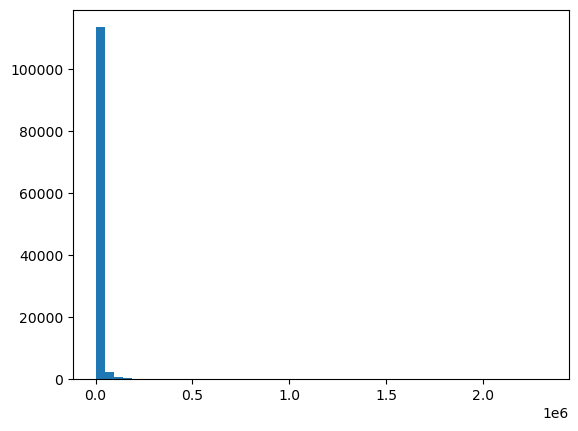

In [66]:
plt.hist(dfi['paidpremium'], bins=50)

In [67]:
dfi.dtypes

year                  int64
state_fips            int64
state_abb            object
county_ansi           int64
county_name          object
commodity_code        int64
commodity_name       object
insurance_code        int64
insur                object
coverage_cat         object
stage                object
causeofloss_code     object
causeofloss          object
month                 int64
month name           object
yearloss            float64
policies1             int64
policies2             int64
plantedq            float64
endorsedq           float64
liability           float64
premium             float64
paidpremium         float64
subsidy             float64
private_subsidy     float64
other_subsidy       float64
discount            float64
netq                float64
indemnity           float64
loss_ratio          float64
dtype: object

In [69]:
def rma_data(file):  
    
    dfi= pd.read_csv(cwd[:-4]+file, header= None, delimiter = "|")
    dfi.columns= ['year', 'state_fips',
            'state_abb', 'county_ansi', 'county_name','commodity_code','commodity_name','insurance_code','insur',
            'coverage_cat','stage','causeofloss_code','causeofloss','month','month name','yearloss','policies1','policies2',
            'plantedq','endorsedq','liability','premium','paidpremium','subsidy','private_subsidy','other_subsidy','discount',
             'netq','indemnity','loss_ratio']
    # drop duplicates (entries in more than one cause of loss)
    dfi.drop_duplicates(subset=['state_fips', 'county_ansi','commodity_code','insurance_code','month','yearloss','liability','premium'], keep= 'first', inplace=True)

    
    dfi['indemnity_eff']= dfi.groupby(['state_fips','county_ansi'])['indemnity'].transform('sum')
    
    dfi['paidpremium_tot']= dfi.groupby(['state_fips','county_ansi'])['paidpremium'].transform('sum')

    
    ## 
    dfi['county_ansi']= dfi['county_ansi'].astype(str).str.zfill(3)
    dfi['state_fips']= dfi['state_fips'].astype(str).str.zfill(2)
    dfi['county_fips']= dfi['state_fips'] +dfi['county_ansi']
    
    # Drop duplicates (same county)
    dfi.drop_duplicates(subset=['state_fips', 'county_ansi'], keep= 'first', inplace=True)

    list2= ['county_fips','indemnity_eff','paidpremium_tot']

    return dfi[list2].fillna(0)

In [104]:
dfrma= pd.DataFrame()
A= ['/Data/colsom12.txt', '/Data/colsom_2017.txt', '/Data/colsom_2022.txt']
C= ['2012','2017', '2022']

for f,y in zip(A,C):
    ## Dataframe for lag 1
    df= rma_data(f)

    df['year']= int(y)
    dfrma= pd.concat([dfrma, df], ignore_index=True)
# Get correct number the counties
dfce['county_fips']= dfce['county_fips'].astype(str)
dfce['county_fips']= dfce['county_fips'].str.zfill(5)
dfrma= pd.merge(dfce[['county_fips','year']], dfrma, how='outer')
dfrma['county_ansi']= dfrma['county_fips'].str[-3:]

/var/folders/7w/z3mdh4qx70v7ppq9m1yhchtm0000gn/T/ipykernel_11046/1998128560.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfce['county_fips']= dfce['county_fips'].astype(str)
/var/folders/7w/z3mdh4qx70v7ppq9m1yhchtm0000gn/T/ipykernel_11046/1998128560.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfce['county_fips']= dfce['county_fips'].str.zfill(5)


In [107]:
dfrma['county_ansi']= dfrma['county_fips'].str[-3:]
dfrma['state_fips']= dfrma['county_fips'].str[:2]
dfrma['999'] = np.where(dfrma['county_ansi']=='999', 1, 0)

In [108]:
dfrma

,county_fips,year,indemnity_eff,paidpremium_tot,county_ansi,999,otherc,indem_999,paid_999,state_fips
0,01001,2012,35913.11,5100.365,001,0,NaN,NaN,NaN,01
1,01003,2012,670316.30,74399.900,003,0,NaN,NaN,NaN,01
2,01005,2012,231137.55,48237.610,005,0,NaN,NaN,NaN,01
3,01007,2012,65945.00,5701.000,007,0,NaN,NaN,NaN,01
4,01009,2012,6411.00,320.000,009,0,NaN,NaN,NaN,01
...,...,...,...,...,...,...,...,...,...,...
9300,48999,2022,453911.00,38962.000,999,1,NaN,453911.0,38962.0,48
9301,51999,2022,9409.00,1500.000,999,1,NaN,9409.0,1500.0,51
9302,53999,2022,68223.00,10826.000,999,1,NaN,68223.0,10826.0,53
9303,54999,2022,3209.00,3081.000,999,1,NaN,3209.0,3081.0,54


In [110]:

dfrma['999'] = np.where(dfrma['county_ansi']=='999', 1, np.nan) # 999 counties
dfrma['otherc']= np.where(dfrma['indemnity_eff']== np.nan, 1, np.nan)# non-values counties

dfrma['indem_999']= dfrma['999']* dfrma['indemnity_eff']
dfrma['paid_999']= dfrma['999']* dfrma['paidpremium_tot']
                        
# distribute 999 state values to counties with missing values
dfrma['indem_999_av']= dfrma.groupby(['state_fips','year'])['indem_999'].transform('sum')/dfrma.groupby(['state_fips','year'])['otherc'].transform('sum')
dfrma['paid_999_av']= dfrma.groupby(['state_fips','year'])['paid_999'].transform('sum')/dfrma.groupby(['state_fips','year'])['otherc'].transform('sum')

## Fill nan values with average 'rest counties '999' value'
dfrma['indemnity_eff_est']= dfrma['indemnity_eff'].fillna(dfrma['indem_999_av'])
dfrma['paidpremium_est']= dfrma['paidpremium_tot'].fillna(dfrma['paid_999_av'])



In [111]:
## remove 999 'rest counties'
dfrma= dfrma[dfrma['999']!= 1]
dfrma= dfrma[['year','county_fips','indemnity_eff_est','paidpremium_est']]
dfrma.replace(np.nan, 0, inplace=True)
dfrma

,year,county_fips,indemnity_eff_est,paidpremium_est
0,2012,01001,35913.11,5100.365
1,2012,01003,670316.30,74399.900
2,2012,01005,231137.55,48237.610
3,2012,01007,65945.00,5701.000
4,2012,01009,6411.00,320.000
...,...,...,...,...
9232,2012,27112,1118796.00,140936.000
9233,2012,27120,3078187.40,486469.200
9242,2012,46113,1933825.00,251428.000
9249,2017,02240,13953.00,458.000


In [8]:
def rma_data(file):  
    
    dfi= pd.read_csv(cwd[:-4]+file, header= None, delimiter = "|", names= ['year', 'state_fips',
        'state_abb', 'county_ansi', 'county_name','commodity_code','commodity_name','insurance_code','insurance_abb',
        'coverage_cat','delivery', 'coverage','policies','pol1','pol2','units_covered',
        'units_indem','quantity_type','net_reported','endorsed_acres','liability','premium',
        'subsidy','private_subsidy','other_subsidy','discount','indemnity','indemn_ratio'])
    
    
    dfi.drop(axis=1, columns=['state_abb','county_name','commodity_code','commodity_name','insurance_code','insurance_abb',
    'coverage_cat','delivery', 'coverage','policies','pol1','pol2',
    'quantity_type','endorsed_acres','discount'], inplace=True)

    
    dfi['indemnity']= dfi['indemnity'].clip(lower=0) #negative indemnity values are set to zero
 
    
    dfi['insured_acres_county'] = dfi.groupby(['state_fips','county_ansi'])['net_reported'].transform('sum')
    
    
    dfi['subs_liab']= (dfi['subsidy']/dfi['liability'])*(dfi['net_reported']/dfi['insured_acres_county'])
    dfi['subsidy_ratio']= dfi.groupby(['state_fips','county_ansi'])['subs_liab'].transform('sum')

    dfi= dfi[dfi['net_reported']>0] 
    dfi['indemnity_acres']= dfi['indemnity']/dfi['net_reported']
    dfi['indemnity_avg']= dfi.groupby(['state_fips','county_ansi'])['indemnity_acres'].transform('mean')

    
    ## 
    dfi['county_ansi']= dfi['county_ansi'].astype(str).str.zfill(3)
    dfi['state_fips']= dfi['state_fips'].astype(str).str.zfill(2)
    dfi['county_fips']= dfi['state_fips'] +dfi['county_ansi']
    
    
    dfi.drop_duplicates(subset=['state_fips', 'county_ansi'], keep= 'first', inplace=True)

    list2= ['year','state_fips','county_ansi','county_fips',
            'subsidy_ratio','indemnity_avg']

    return dfi[list2].fillna(0)

In [9]:
dfrma= pd.DataFrame()
B= ['/Data/sobcov12.txt','/Data/sobcov_2017.txt',
    '/Data/sobcov_2022.txt']

C= ['2012','2017','2022']

for f,y in zip(B,C):
    df= rma_data(f)
    df['year']= int(y)

    dfrma= dfrma.append(df, ignore_index=True)


In [10]:
dfrma

,year,state_fips,county_ansi,county_fips,subsidy_ratio,indemnity_avg
0,2012,02,999,02999,0.099554,0.000000
1,2012,02,240,02240,0.145562,15.195264
2,2012,01,999,01999,0.072350,13.330373
3,2012,01,001,01001,0.107912,6.848460
4,2012,01,003,01003,0.060498,15.233686
...,...,...,...,...,...,...
8351,2022,56,035,56035,0.106029,4.397815
8352,2022,56,037,56037,0.108176,4.583517
8353,2022,56,041,56041,0.104611,15.692636
8354,2022,56,043,56043,0.096325,2.175135


## Conservation Programs Payments- Cover crops
Available at: farmers.gov

In [68]:
dfnc= pd.read_csv(cwd[:-4]+'/Data/financial-assistance-data/Practice_Political_Download.csv')

In [69]:
dfnc['fips_code']= dfnc['fips_code'].str.zfill(5)

# Remove national data and nontinuous states
dfnc= dfnc[dfnc['geography_level']!= 'National']
dfnc= dfnc[dfnc['county_name']!= 'Total']
A= ['Alaska','Hawaii','American Samoa', 'Northern Mariana Islands', 'Puerto Rico',
       'U.S. Virgin Islands', 'Guam']
for x in A:
    dfnc = dfnc[dfnc['state']!= x]
    
## Keep cover crops data
#C= sorted(dfnc.practice_name.unique().tolist())
listC= ['Cover Crop',
 'Cover crop to minimize soil compaction',
 'Cover crop to minimize soil compaction ',
 'Cover crop to reduce soil erosion',
 'Cover crop to reduce water erosion',
 'Cover crop to reduce water quality degradation by utilizing excess soil nutrients',
 'Cover crop to reduce water quality degradation by utilizing excess soil nutrients-ground water',
 'Cover crop to reduce water quality degradation by utilizing excess soil nutrients-surface water',
 'Cover crop to reduce wind erosion',
 'Cover crop to suppress excessive weed pressures and break pest cycles']

dfnc= dfnc[dfnc['practice_name'].isin(listC)]


In [61]:
# Aggregate into program groups
dfnc['eqip']= np.where((dfnc['program']=='EQIP') | (dfnc['program']=='RCPP-EQIP'), dfnc['dollars_obligated'], 0)
dfnc['csp']= np.where((dfnc['program']=='CSP') | (dfnc['program']=='RCPP-CSP'), dfnc['dollars_obligated'], 0)
dfnc['other_consprog']= np.where((dfnc['program']=='AMA') | (dfnc['program']=='AWEP'), dfnc['dollars_obligated'], 0)

dfnc['eqip_tot']= dfnc.groupby(['fips_code','obligation_fy'])['eqip'].transform(sum)
dfnc['csp_tot']= dfnc.groupby(['fips_code','obligation_fy'])['csp'].transform(sum)
dfnc['others_tot']= dfnc.groupby(['fips_code','obligation_fy'])['other_consprog'].transform(sum)


In [62]:
# Aggregate by periods
condlist= [((dfnc['obligation_fy']== '2014') |(dfnc['obligation_fy']== '2015') |(dfnc['obligation_fy']== '2016') 
           ),  
          ((dfnc['obligation_fy']== '2019') |(dfnc['obligation_fy']== '2020') 
           |(dfnc['obligation_fy']== '2021'))]
choicelist=[1, 2]
dfnc['base'] = np.select(condlist, choicelist, np.nan)

dfnc['eqip']= dfnc.groupby(['fips_code','base'])['eqip_tot'].transform(sum)
dfnc['csp']= dfnc.groupby(['fips_code','base'])['csp_tot'].transform(sum)

# fill 2017 and 2022 values with period aggregates
dfnc['eqip']= dfnc['eqip'].shift()
dfnc['csp']= dfnc['csp'].shift()

## t-1 payments

dfnc['eqip_t-1']= dfnc['eqip_tot'].shift()
dfnc['csp_t-1']= dfnc['csp_tot'].shift()

In [64]:
dfnc= dfnc[(dfnc['obligation_fy']=='2017') | (dfnc['obligation_fy']=='2022')]

In [76]:
(dfnc['suppressed']==False).sum()

15813

In [75]:
dfnc#[dfnc['county_name']=='Baldwin']#.head(30)#.practice_name.unique()

,Unnamed: 0,geography_level,state,county_name,fips_code,program,practice_code,practice_name,obligation_fy,certification_fy,practice_count,dollars_obligated,suppressed
399347,399348,County,Alabama,Baldwin,01003,EQIP,340,Cover Crop,Total,NaN,131.0,1.373323e+06,False
399391,399392,County,Alabama,Baldwin,01003,EQIP,340,Cover Crop,2014,NaN,22.0,2.487442e+05,False
399412,399413,County,Alabama,Baldwin,01003,EQIP,340,Cover Crop,2015,NaN,10.0,8.744300e+04,False
399433,399434,County,Alabama,Baldwin,01003,EQIP,340,Cover Crop,2016,NaN,19.0,1.708031e+05,False
399455,399456,County,Alabama,Baldwin,01003,EQIP,340,Cover Crop,2017,NaN,28.0,1.891054e+05,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1168416,1168417,County,Wyoming,Washakie,NaN,AMA,340,Cover Crop,2023,NaN,NaN,NaN,True
1168842,1168843,County,Indiana,La Grange,NaN,AWEP,340,Cover Crop,Total,NaN,NaN,NaN,True
1168849,1168850,County,Indiana,Noble,NaN,AWEP,340,Cover Crop,Total,NaN,NaN,NaN,True
1168861,1168862,County,Indiana,La Grange,NaN,AWEP,340,Cover Crop,2014,NaN,NaN,NaN,True


## Region codes

In [43]:
## State abbreviations and regions
dfr= pd.read_csv(cwd[:-4]+'/Data/us_regions.csv', low_memory= False)
dfr['Fips']= dfr['Fips'].astype(str).str.zfill(2)
dfr.rename(columns={'Fips': 'state_fips', 'Abbreviation': 'state_abb'}, inplace=True)


In [111]:
dfag.columns

Index(['county_fips', 'year', 'state_prog_receipts', 'state_prog_ope',
       'organic_ope', 'org_trans_ope', 'crop_insurance_ope',
       'crop_insurance_acres'],
      dtype='object')

## Merge dataframes

In [149]:
DF= pd.DataFrame()
DF= pd.merge(dfce,dfag, how='outer', indicator='merger') # both df are: 0 is 0, np.nan is (D)

for x in ['state_prog_receipts', 'state_prog_ope','organic_ope', 'org_trans_ope', 'crop_insurance_ope',
       'crop_insurance_acres']:
    DF.loc[(DF[x].isna()) & (DF['merger']=='left_only'), x] = 0  # values not coinciding are zero

In [159]:
DF.iloc[:,20:40]#[DF['merger']== 'left_only']

,FARM OPERATIONS - ACRES OPERATED,"FARM OPERATIONS - AREA OPERATED, MEASURED IN ACRES / OPERATION, MEDIAN",FARM OPERATIONS - NUMBER OF OPERATIONS,"GOVT PROGRAMS, FEDERAL, (EXCL CONSERVATION & WETLANDS) - OPERATIONS WITH RECEIPTS","GOVT PROGRAMS, FEDERAL, (EXCL CONSERVATION & WETLANDS) - RECEIPTS, MEASURED IN $","GOVT PROGRAMS, FEDERAL, CONSERVATION & WETLANDS - ACRES","GOVT PROGRAMS, FEDERAL, CONSERVATION & WETLANDS - OPERATIONS WITH RECEIPTS","GOVT PROGRAMS, FEDERAL, CONSERVATION & WETLANDS - RECEIPTS, MEASURED IN $","INCOME, FARM-RELATED - OPERATIONS WITH RECEIPTS","INCOME, FARM-RELATED - RECEIPTS, MEASURED IN $","LABOR, CONTRACT - EXPENSE, MEASURED IN $","LABOR, HIRED - EXPENSE, MEASURED IN $","LABOR, HIRED - NUMBER OF WORKERS","PRODUCERS, BLACK OR AFRICAN AMERICAN - ACRES OPERATED","PRODUCERS, BLACK OR AFRICAN AMERICAN - NUMBER OF PRODUCERS","PRODUCERS, FEMALE - ACRES OPERATED","PRODUCERS, FEMALE - NUMBER OF PRODUCERS","PRODUCERS, HISPANIC - ACRES OPERATED","PRODUCERS, HISPANIC - NUMBER OF PRODUCERS","PRODUCERS, WHITE - ACRES OPERATED"
0,111504.0,100.0,389,113,1081000.0,3297.0,36,164000.0,118,1712000.0,244000.0,2042000.0,490.0,5612.0,86,32159.0,150,NaN,1,104922.0
1,192320.0,41.0,989,203,2231000.0,7862.0,98,419000.0,326,3579000.0,3129000.0,13867000.0,1154.0,980.0,33,40836.0,464,931.0,24,190667.0
2,204258.0,186.0,571,250,1145000.0,15685.0,215,661000.0,193,4809000.0,644000.0,3847000.0,404.0,11774.0,79,59533.0,211,2810.0,8,194896.0
3,56276.0,100.0,189,21,118000.0,486.0,11,20000.0,26,539000.0,55000.0,151000.0,57.0,63.0,3,16815.0,78,NaN,1,55398.0
4,146189.0,65.0,1241,216,838000.0,1318.0,34,59000.0,238,1768000.0,724000.0,4493000.0,978.0,0.0,0,48655.0,549,990.0,15,145357.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9212,1372065.0,290.0,183,61,2428000.0,900.0,6,24000.0,49,2017000.0,217000.0,1040000.0,95.0,0.0,0,245168.0,138,2104.0,9,1371949.0
9213,38130.0,100.0,111,1,NaN,0.0,0,0.0,27,3475000.0,53000.0,3626000.0,240.0,0.0,0,19509.0,82,NaN,4,38130.0
9214,735709.0,79.0,391,68,NaN,NaN,1,NaN,124,2491000.0,224000.0,2889000.0,304.0,0.0,0,352103.0,351,178.0,6,735649.0
9215,368504.0,79.0,206,59,4019000.0,1552.0,5,38000.0,86,2237000.0,700000.0,5880000.0,352.0,0.0,0,169085.0,141,17649.0,10,NaN


In [152]:
DF.drop(columns='merger', inplace=True)
DF= pd.merge(DF, dfcc, how= 'left', indicator='merger') # + cover crops
DF.loc[(DF['cover_crop_acres'].isna()) & (DF['merger']=='left_only'), 'cover_crop_acres'] = 0
DF.loc[(DF['cover_crop_ops'].isna()) & (DF['merger']=='left_only'), 'cover_crop_ops'] = 0
DF['cover_crop_acres']= DF['cover_crop_acres'].replace('(D)', np.nan, regex=True)
DF['cover_crop_acres']= DF['cover_crop_acres'].astype(float)

In [153]:
DF.drop(columns='merger', inplace=True)
DF= pd.merge(DF, dfyale, how= 'left') # + Yale opinion questions
DF= pd.merge(DF, dfemp, how= 'left') # + agricultural employment data
DF= pd.merge(DF, dfu, how= 'left') # + land grand universities
DF= pd.merge(DF, dfen, how= 'left') # + cropland diversity

DF= pd.merge(DF, dfcl, how= 'left') # + climate indicators
DF['state_fips']= DF['county_fips'].str[:-3]

DF= pd.merge(DF, dfrma, how= 'left', indicator='merger') # + indemnity data RMA
for x in ['indemnity_eff_est', 'paidpremium_est']:
    DF.loc[(DF[x].isna()) & (DF['merger']=='left_only'), x] = 0  # values not coinciding are zero

DF= pd.merge(DF, dfr, on='state_fips') # + region codes, state abbreviations

In [160]:
DF.iloc[:,50:60]

,state_prog_receipts,state_prog_ope,organic_ope,org_trans_ope,crop_insurance_ope,crop_insurance_acres,cover_crop_acres,cover_crop_ops,human,personal
0,0.0,0.0,0.0,0.0,47.0,18797.0,2392.0,36.0,43.00,30.00
1,6000.0,7.0,5.0,3.0,126.0,66221.0,35336.0,158.0,43.00,30.00
2,0.0,2.0,1.0,0.0,59.0,16019.0,8276.0,64.0,43.00,33.00
3,0.0,0.0,0.0,0.0,4.0,NaN,NaN,6.0,39.00,29.00
4,32000.0,6.0,3.0,0.0,42.0,5591.0,2180.0,78.0,48.00,31.00
...,...,...,...,...,...,...,...,...,...,...
9212,0.0,0.0,0.0,0.0,18.0,28941.0,0.0,0.0,40.77,34.09
9213,0.0,1.0,0.0,0.0,8.0,4450.0,0.0,0.0,59.07,45.93
9214,0.0,1.0,1.0,0.0,9.0,27469.0,0.0,0.0,43.13,36.28
9215,0.0,1.0,0.0,0.0,28.0,28017.0,0.0,0.0,42.02,35.76


In [127]:
(DF.iloc[:,20:40]).dtypes

FARM OPERATIONS - ACRES OPERATED                                                     float64
FARM OPERATIONS - AREA OPERATED, MEASURED IN ACRES / OPERATION, MEDIAN               float64
FARM OPERATIONS - NUMBER OF OPERATIONS                                                 int64
GOVT PROGRAMS, FEDERAL, (EXCL CONSERVATION & WETLANDS) - OPERATIONS WITH RECEIPTS      int64
GOVT PROGRAMS, FEDERAL, (EXCL CONSERVATION & WETLANDS) - RECEIPTS, MEASURED IN $     float64
GOVT PROGRAMS, FEDERAL, CONSERVATION & WETLANDS - ACRES                              float64
GOVT PROGRAMS, FEDERAL, CONSERVATION & WETLANDS - OPERATIONS WITH RECEIPTS             int64
GOVT PROGRAMS, FEDERAL, CONSERVATION & WETLANDS - RECEIPTS, MEASURED IN $            float64
INCOME, FARM-RELATED - OPERATIONS WITH RECEIPTS                                        int64
INCOME, FARM-RELATED - RECEIPTS, MEASURED IN $                                       float64
LABOR, CONTRACT - EXPENSE, MEASURED IN $                              

## Variable definition

In [157]:
# convert columns to numeric and replace str ('D') for np.nan
listn= DF.columns.to_list()[1:41]
listn2= DF.columns.to_list()[42:50]
listn3= DF.columns.to_list()[62:65]
for x in listn + listn2+ listn3:
    try:
        DF[x]= DF[x].str.replace(',', '', regex=False) #this code converts 0 (values not reported by USDA) to nan
        DF[x].replace(np.nan, 0, inplace=True) #convert back to zero
    except:
        pass
    DF[x]= pd.to_numeric(DF[x], errors='coerce')# (D) becomes nan


### Cover crop Practices

In [52]:

DF['covercrop_acres']= (DF['cover_crop_acres']+ DF['PRACTICES, LAND USE, CROPLAND, COVER CROP PLANTED, (EXCL CRP) - ACRES'])/DF['FARM OPERATIONS - ACRES OPERATED']
DF['covercrop_ope']= (DF['cover_crop_ops']+DF['PRACTICES, LAND USE, CROPLAND, COVER CROP PLANTED, (EXCL CRP) - NUMBER OF OPERATIONS'])/DF['FARM OPERATIONS - NUMBER OF OPERATIONS']


### Farm Management

In [53]:
DF['pasture_cropland']= DF['AG LAND, CROPLAND, PASTURED ONLY - ACRES']/DF['AG LAND, CROPLAND - ACRES']
DF['irrigated_harvcropland']= DF['AG LAND, CROPLAND, HARVESTED, IRRIGATED - ACRES']/DF['AG LAND, CROPLAND, HARVESTED - ACRES']
DF['irrigated_harvcrop_ope']= DF['AG LAND, CROPLAND, HARVESTED, IRRIGATED - NUMBER OF OPERATIONS']/DF['AG LAND, CROPLAND, HARVESTED - NUMBER OF OPERATIONS']
DF['tot_expense']= DF['EXPENSE TOTALS, OPERATING - EXPENSE, MEASURED IN $ / OPERATION']*DF['EXPENSE TOTALS, OPERATING - OPERATIONS WITH EXPENSE']
DF['median_farmsize']= DF['FARM OPERATIONS - AREA OPERATED, MEASURED IN ACRES / OPERATION, MEDIAN']

DF['labor_expense']= (DF['LABOR, CONTRACT - EXPENSE, MEASURED IN $']+DF['LABOR, HIRED - EXPENSE, MEASURED IN $'])/DF['tot_expense']
DF['rent_expense']= DF['RENT, CASH, LAND & BUILDINGS - EXPENSE, MEASURED IN $']/DF['tot_expense']
DF['org_ope']= (DF['organic_ope']+ DF['org_trans_ope'])/DF['FARM OPERATIONS - NUMBER OF OPERATIONS']
DF['agr_employ']= (DF['farmers_employm']+ DF['infarms_employ'])/DF['tot_employ']



### Economic policies

In [54]:
DF['cons_prog_income']= DF['GOVT PROGRAMS, FEDERAL, CONSERVATION & WETLANDS - RECEIPTS, MEASURED IN $']/DF['INCOME, FARM-RELATED - RECEIPTS, MEASURED IN $']
DF['state_prog_ope']= DF['state_prog_ope']/DF['FARM OPERATIONS - NUMBER OF OPERATIONS']
DF['insurance_acres']= DF['crop_insurance_acres']/DF['FARM OPERATIONS - ACRES OPERATED']
DF['indemn_income']= DF['indemnity_dollars_est']/DF['INCOME, FARM-RELATED - RECEIPTS, MEASURED IN $']
DF['indemn_dollars_pa']= DF['indemnity_dollars_est']/DF['FARM OPERATIONS - ACRES OPERATED']
DF['indemn_acres_pa']= DF['indemnity_acres_est']/DF['FARM OPERATIONS - ACRES OPERATED']
DF['noncons_prog_income']=DF['GOVT PROGRAMS, FEDERAL, (EXCL CONSERVATION & WETLANDS) - RECEIPTS, MEASURED IN $']/DF['INCOME, FARM-RELATED - RECEIPTS, MEASURED IN $']

In [128]:
DF['indemn_net']= (DF['indemnity_eff_est']- DF['paidpremium_est'])/DF['INCOME, FARM-RELATED - RECEIPTS, MEASURED IN $']


(array([4.761e+03, 1.601e+03, 8.590e+02, 4.690e+02, 3.030e+02, 1.940e+02,
        1.290e+02, 9.700e+01, 8.000e+01, 4.400e+01, 4.300e+01, 3.900e+01,
        1.700e+01, 2.500e+01, 1.700e+01, 2.500e+01, 1.300e+01, 1.100e+01,
        4.000e+00, 3.000e+00, 2.000e+00, 6.000e+00, 7.000e+00, 2.000e+00,
        4.000e+00, 5.000e+00, 2.000e+00, 4.000e+00, 2.000e+00, 1.000e+00,
        2.000e+00, 2.000e+00, 1.000e+00, 2.000e+00, 0.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
        1.000e+00, 1.000e+00]),
 array([0.        , 0.02608696, 0.05217391, 0.07826087, 0.10434783,
        0.13043478, 0.15652174, 0.1826087 , 0.20869565, 0.23478261,
        0.26086957, 0.28695652, 0.31304348, 0.33913043, 0.36521739,
        0.39130435, 0.4173913 , 0.44347826, 0.46956522, 0.49565217,
        0.52173913, 0.54782609, 0.57391304, 0.6       , 0.62608696,
        0.65217391, 0.67826087, 0.70

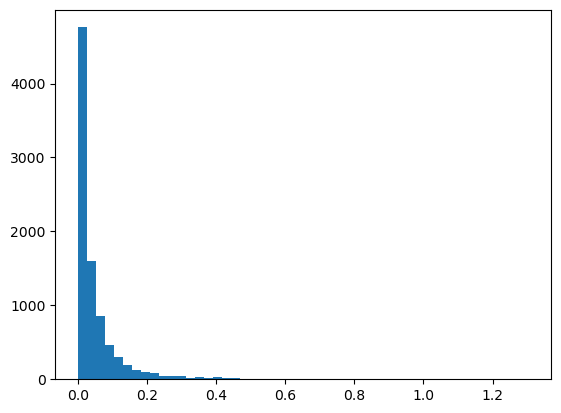

In [131]:
plt.hist(DF['covercrop_acres'], bins=50)

### Demographics

In [56]:
# Proportion of land in demographic groups (0-1)
DF['women_acres']= DF['PRODUCERS, FEMALE - ACRES OPERATED']/DF['FARM OPERATIONS - ACRES OPERATED']
DF['hispanic_acres']= DF['PRODUCERS, HISPANIC - ACRES OPERATED']/DF['FARM OPERATIONS - ACRES OPERATED']
DF['black_acres']= DF['PRODUCERS, BLACK OR AFRICAN AMERICAN - ACRES OPERATED']/DF['FARM OPERATIONS - ACRES OPERATED']
DF['white_acres']= DF['PRODUCERS, WHITE - ACRES OPERATED']/DF['FARM OPERATIONS - ACRES OPERATED']

### Climate risks opinion

In [57]:
DF['individual']= (DF['personal']+DF['timing'])/(2*100)
DF['human']= DF['human']/100
DF['regulate']= DF['regulate']/100

In [59]:
for x in ['tavg','edd','pcp_mm','pcpdays']:
    DF[x+'_coeffvar']= DF[x+'_std']/DF[x+'_mean']

In [133]:
DF.to_csv(cwd[:-4]+'/Data/counties_data_2012_2022.csv', index=False)

In [20]:
DF= pd.read_csv(cwd[:-4]+'/Data/counties_data_2012_2022.csv')

In [22]:
DF['county_fips']= DF['county_fips'].astype(str).str.zfill(5)

In [23]:
DF.drop(columns=['State', 'state_abb','Region', 'Region_fips', 'Subregion','subregion_fips'], inplace=True)
DF['state_fips']= DF['state_fips'].astype(str).str.zfill(2)
dfr= pd.read_csv(cwd[:-4]+'/Data/us_regions.csv', low_memory= False)
dfr['Fips']= dfr['Fips'].astype(str).str.zfill(2)
dfr.rename(columns={'Fips': 'state_fips', 'Abbreviation': 'state_abb'}, inplace=True)
DF= pd.merge(DF, dfr, on='state_fips')

In [24]:
DF.drop(columns=['tavg_mean', 'tavg_std', 'edd_mean', 'edd_std',
       'pcp_mm_mean', 'pcp_mm_std', 'pcpdays_mean', 'pcpdays_std',
       'tavg_mean_base', 'tavg_std_base', 'edd_mean_base', 'edd_std_base',
       'pcp_mm_mean_base', 'pcp_mm_std_base', 'pcpdays_mean_base',
       'pcpdays_std_base', 'tavg_z', 'edd_z', 'pcp_mm_z', 'pcpdays_z'], inplace=True)

In [21]:
DF= pd.merge(DF, dfrma[['year', 'county_fips', 'subsidy_ratio',
       'indemnity_avg']], how= 'left') # + indemnity data RMA


In [25]:
DF= pd.merge(DF, dfcl, how= 'left') # + climate indicators

In [27]:
DF['cc_acres'] = np.where(DF['year']==2012, DF['cover_crop_acres']/2, 0)
DF['cc_ope'] = np.where(DF['year']==2012, DF['cover_crop_ops']/2, 0)
DF['covercrop_acres']= (DF['cc_acres']+DF['PRACTICES, LAND USE, CROPLAND, COVER CROP PLANTED, (EXCL CRP) - ACRES'])/DF['AG LAND, CROPLAND - ACRES']
DF['covercrop_ope']= (DF['cc_ope']+DF['PRACTICES, LAND USE, CROPLAND, COVER CROP PLANTED, (EXCL CRP) - NUMBER OF OPERATIONS'])/DF['AG LAND, CROPLAND - NUMBER OF OPERATIONS']


In [30]:
DF['cc_acres_tot']= DF['cc_acres']+DF['PRACTICES, LAND USE, CROPLAND, COVER CROP PLANTED, (EXCL CRP) - ACRES']
DF['cc_ope_tot']= DF['cc_ope']+DF['PRACTICES, LAND USE, CROPLAND, COVER CROP PLANTED, (EXCL CRP) - NUMBER OF OPERATIONS']

In [28]:
DF['human']= DF['human']/100
DF['regulate']= DF['regulate']/100

In [32]:
DF.groupby('year')['cc_ope_tot'].sum()

year
2012    133072.0
2017    153304.0
2022    153221.0
Name: cc_ope_tot, dtype: float64

In [33]:
DF.to_csv(cwd[:-4]+'/Data/counties_data_2012_2022.csv', index=False)